# TITANIC PASSENGER  SURVIVAL PREDICTION by using machine learning

here the goal is to predict the titanic passengers survival by using Logistic Regressing machine learning algorithm 

We have access to a bunch of 9 features.
The big challenge with this dataset  is the size of the data we have.we do nat have enough data to train and test .


Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Importing dataset 

In [2]:
df=pd.read_csv(r"C:\ravi\data science  with python\titanic_train (1).csv")

# DATA PREPROCESSING AND EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(columns = ['PassengerId','Ticket','Cabin','Name'],inplace = True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df.shape

(891, 8)

In [11]:
df['Age']=df['Age'].fillna=0

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
df['Embarked']=df['Embarked'].fillna=0

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

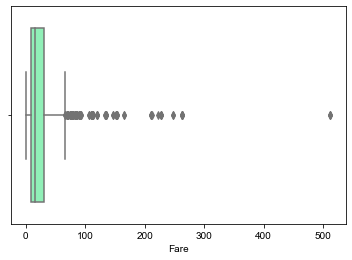

In [15]:
sns.boxplot(x=df['Fare'],palette='rainbow')
sns.set(rc={'figure.figsize':(25,5)})


as w can see there is so many outiers

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


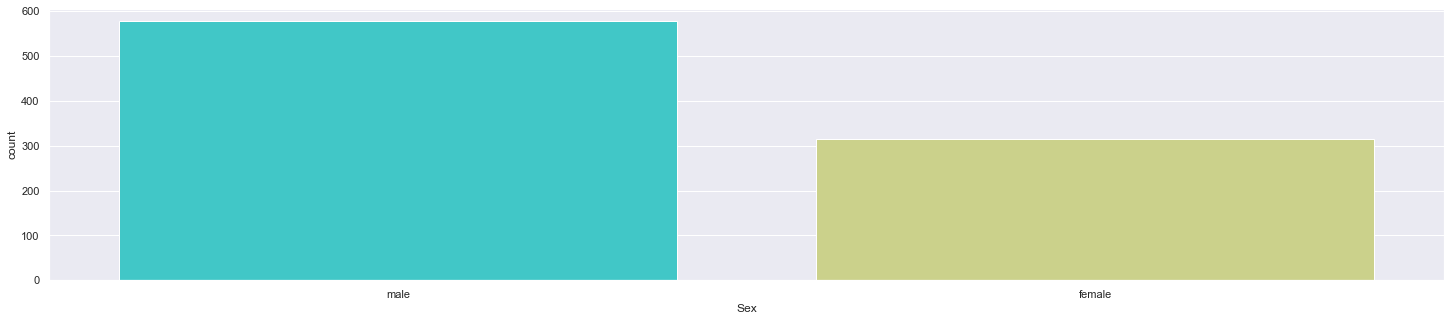

In [20]:
sns.countplot(df['Sex'],palette='rainbow')
sns.set(rc={'figure.figsize':(20,5)})


C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


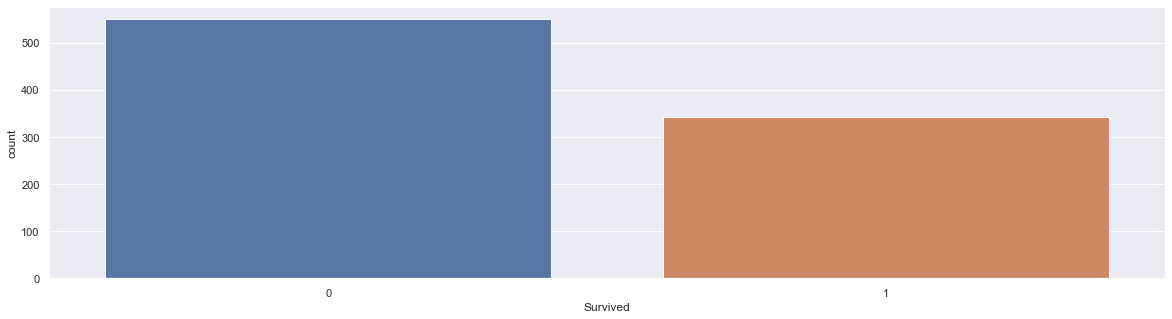

In [21]:
sns.countplot(df['Survived'])
sns.set(rc={'figure.figsize':(20,5)})

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

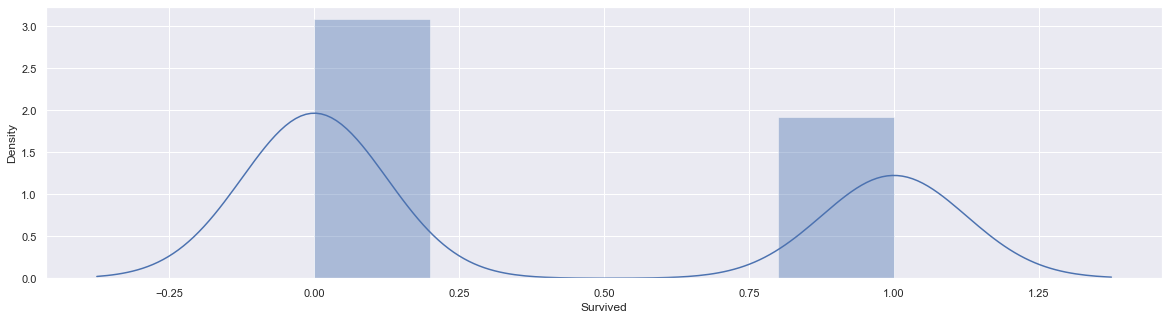

In [70]:
sns.distplot(df.Survived)


C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

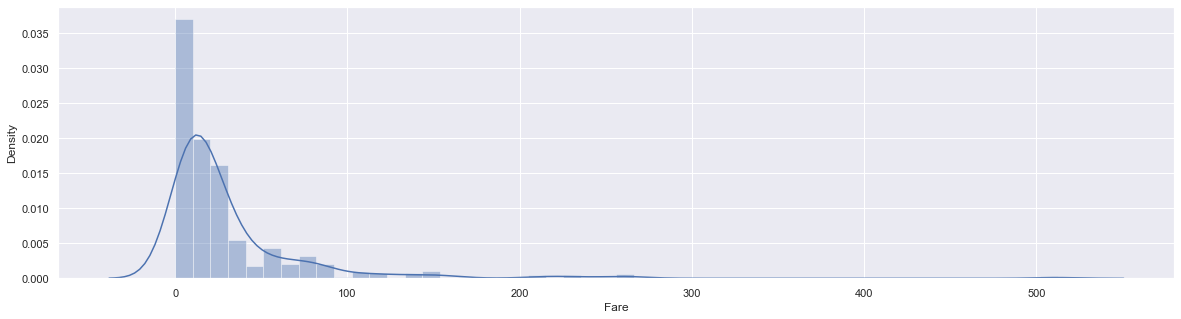

In [69]:
sns.distplot(df.Fare)

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


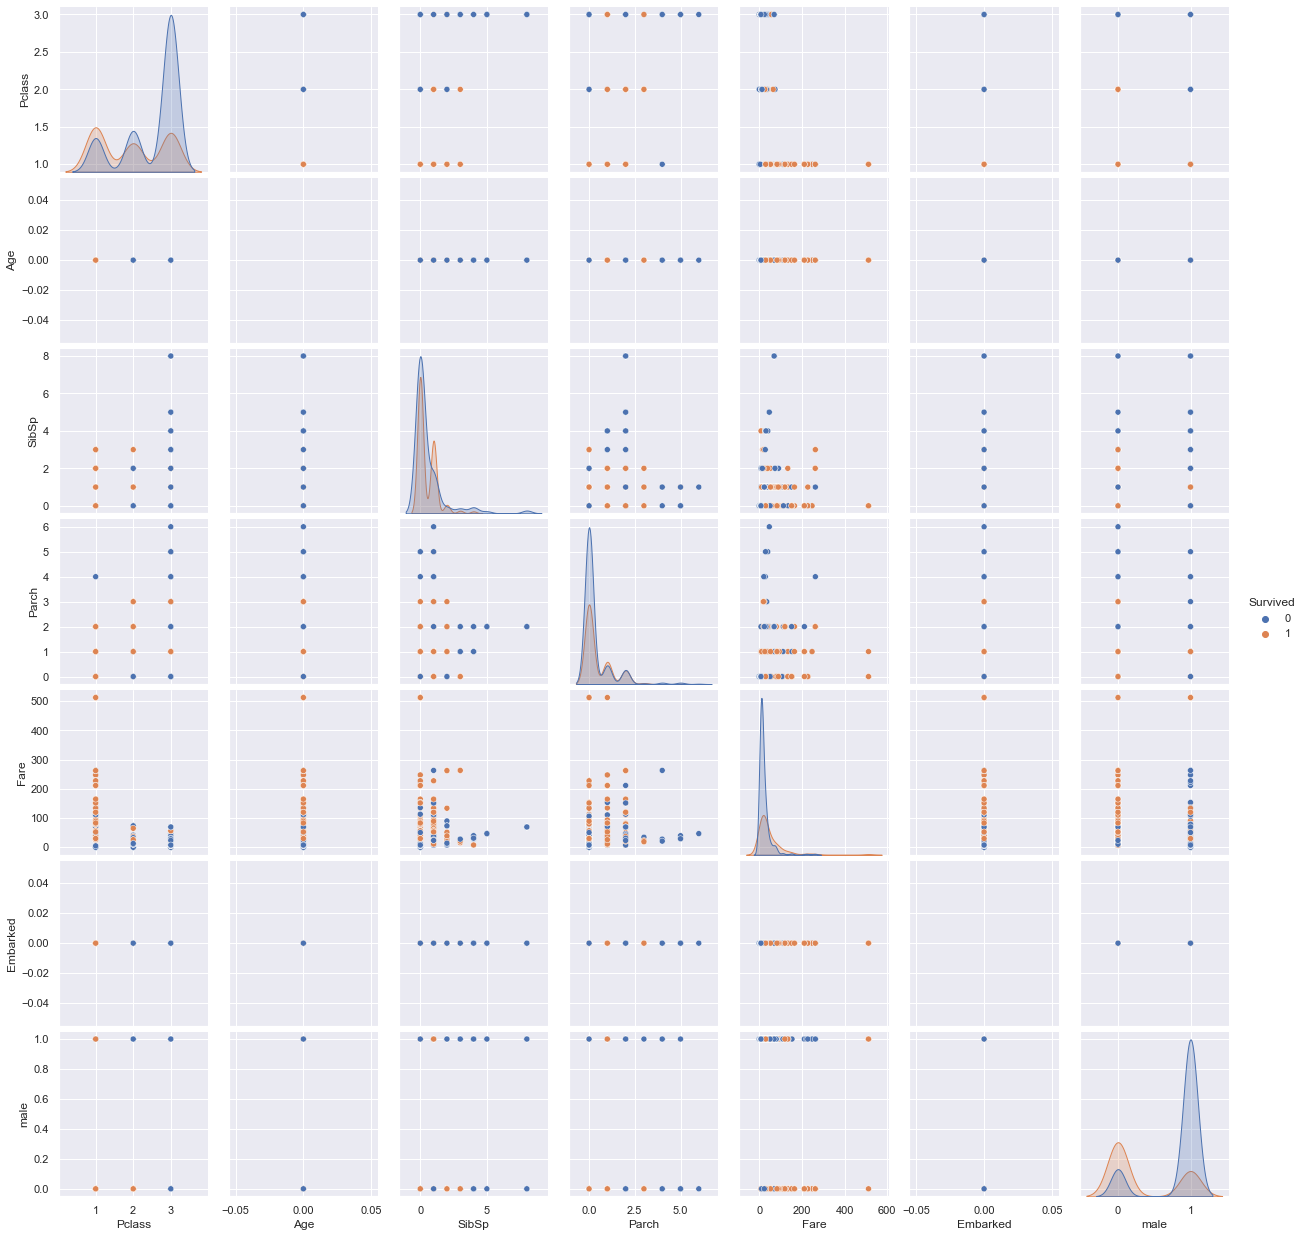

In [77]:
sns.pairplot(df,hue='Survived')

In [84]:
df.groupby('Age').count()['Survived'] 

Age
0    891
Name: Survived, dtype: int64

In [87]:
df.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

Using dummies function for sex and embarked to simplify our data  and converting age column into numerical value because machine leaning can not works on characters 

In [22]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [23]:

embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [24]:
df_sex= df['Sex'].replace([0,1],['female','male'],inplace=True)

In [25]:
df = pd.concat([df,sex,embarked],axis=1)

In [26]:
df.drop('Sex',axis=1,inplace=True)

In [27]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,0,1,0,7.2500,0,1
1,1,1,0,1,0,71.2833,0,0
2,1,3,0,0,0,7.9250,0,0
3,1,1,0,1,0,53.1000,0,0
4,0,3,0,0,0,8.0500,0,1


# MODELING

Here x is our features
:-Pclass
:-Age
:-SibSp
:-Parch
:-Fare
:-Embarked
:-male

and y is our Target variable 
:-Survivived

In [28]:
x=df.drop('Survived',axis=1)

In [29]:
y=df[['Survived']]

Importing train and test split to train our model we are using 70:30 ratio 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [32]:
x_train.shape

(623, 7)

In [33]:
x_test.shape

(268, 7)

In [34]:
y_train.shape

(623, 1)

In [35]:
y_test.shape

(268, 1)

importing  Logistic Regression from sklearn  to fit and predict our model and comparre the predicted model with our actual model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr= LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [39]:
y_pred=lr.predict(x_test)

In [40]:
y_pred[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [41]:
y_test.head(10)

,Survived
617,0
379,0
725,0
826,0
450,0
147,0
698,0
397,0
525,0
505,0


to check out model error and accuracy importing mean_squared_error from sklearn metrics and confusion matrix 

In [42]:
 from sklearn.metrics import mean_squared_error

In [43]:
mse=mean_squared_error(y_pred,y_test)

In [44]:
mse

0.19776119402985073

as we can see our model error is 19.77 with is very less error and our model is acceptable

In [45]:
from sklearn.metrics import  confusion_matrix

In [46]:
confusion_matrix(y_pred,y_test)

array([[142,  34],
       [ 19,  73]], dtype=int64)

In [47]:
(142+73)/(142+73+34+19)

0.8022388059701493

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

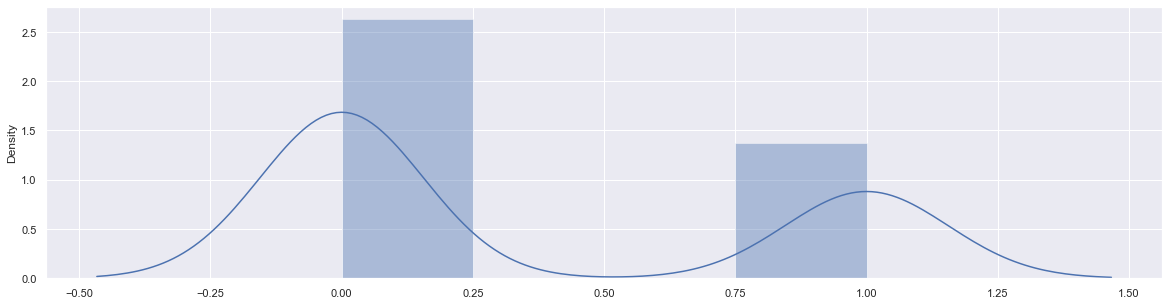

In [49]:
sns.distplot(y_pred)

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

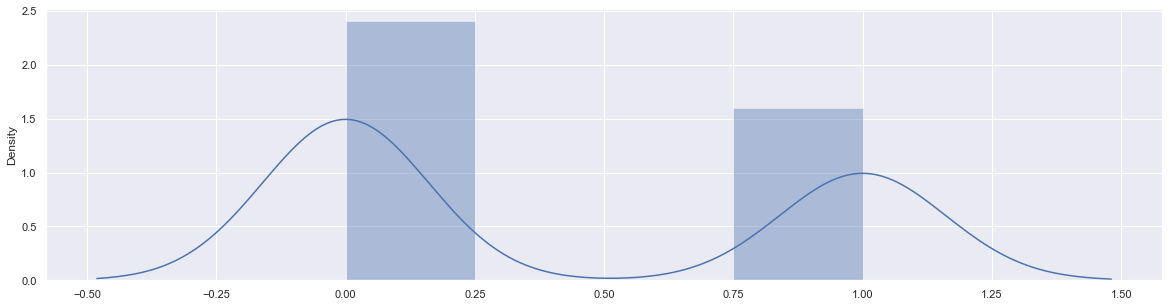

In [57]:
sns.distplot(y_test)